<a href="https://colab.research.google.com/github/casjunior93/Desafio-Regressao---Tera/blob/master/Desafio_Regress%C3%A3o_Tera_Refeito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Habilitando acesso do Colab ao Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bibliotecas fundamentais

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Roteiro do Projeto

O livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/maos-a-obra/9788550803814/) traz uma sugestão de roteiro para orientar um projeto de aprendizado de máquina. Os passos gerais são:

1.   Abordar o problema e analisar o panorama em geral
2.   Obter os dados
3.   Explorar os dados para obter informações úteis
4.   Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.
5.   Explorar modelos diferentes e selecionar os melhores.
6.   Aperfeiçoar os modelos e os combinar em uma solução ideal.
7.   Apresentar a solução.
8.   Implementar, monitorar e fazer a manutenção de seu sistema.

# 1 Abordar o problema e analisar o panorama em geral

Como mostra o excelente artigo [Precificação do imóvel através de estudo comparativo de mercado](https://remaxrs.com.br/blog/precificacao-do-imovel-atraves-de-estudo-comparativo-de-mercado-re-max/), definir o preço correto para a venda de um imóvel é muito importante, para evitar que se perca dinhero na venda de um imóvel ou que este seja supervalorizado, impedindo a venda. Por isso é importante atentar-se no processo de precificação, que envolve um conjunto de critérios como método, tempo e análise.

Como conhecimento de um expert da área de venda de imóveis, vou utilizar o artigo citado anteriormente para encontrar os principais atributos que influenciam na precificação de um imóvel. No artigo, encontramos que estes fatores são importantes:

* Localização
* Terreno
* Vizinhança
* Tipo de construção
* Idade
* Infraestrutura
* Segurança
* Acabamento
* Estado de conservação

Cabe analisar se os dados na base utilizada englobam os fatores de precificação apresentados.

# 2 Obter os dados

Dados: [Link](https://raw.githubusercontent.com/casjunior93/Desafio-Regressao---Tera/master/dados/base.csv)

Dicionário: [link](https://github.com/casjunior93/Desafio-Regressao---Tera/raw/master/dados/Dicion%C3%A1rio%20de%20dados.pdf)

## 2.1 Listar os dados necessários

Utilizando os fatores que influenciam na precificação, levantados no passo 1, torna-se necessário analisar se a base de dados que temos contém dados sobre estes fatores. Para esta análise, vou utilizar o dicionário dos dados fornecido no passo 2 para analisar os atributos que temos.

### 2.1.1 Atributos de **Localização**

*  `ClasseZona` - A classificação geral de zoneamento
*  `Rua` - Tipo de acesso rua
*  `Beco` - Tipo de acesso beco
*  `Bairro` - Locais dentro dos limites da cidade de Ames
*  `Estrada1` - Proximidade com estrada principal ou ferroviária
*  `Estrada2` - Proximidade de estrada principal ou ferroviária (se um segundo estiver presente)


### 2.1.2 Terreno

*  `TamanhoLote` - Tamanho do lote em pés quadrados
*  `FormaProp` - Forma geral da propriedade
*  `PlanoProp` - Planicidade da propriedade
*  `ConfigLote` - Configuração Lote
*  `InclinacaoLote` - Inclinação da propriedade

### 2.1.3 Vizinhança

Sem dados relacionados.

### 2.1.4 Tipo de construção

*  `TipoAlvenaria` - Tipo Alvenaria
*  `AreaAlvenaria` - Área Alvenaria
*  `TipoFundacao` - Tipo de fundação

### 2.1.5 Idade

*  `AnoConstrucao` - Data de construção original
*  `AnoReforma` - Data da reforma

### 2.1.6 Infraestrutura

*  `TipoHabitacao` - Tipo de habitação
*  `EstiloHabitacao` - Estilo de habitação
*  `TipoTelhado` - Tipo de telhado
*  `InstalacaoEletrica` - Instalação elétrica
*  `AreaTerreo` - Área Térreo (pés quadrados)
*  `AreaConstruida` - Área construída
*  `Banheiro` - Banheiros térreo e acima
*  `Cozinha` - Número de cozinhas
*  `TotalQuartos` - Total de quartos (térreo e acima)
*  `LocalGaragem` - LocalGaragem
*  `CarrosGaragem` - Tamanho da garagem em capacidade de carros
*  `AreaPiscina` - Área da piscina em pés quadrados
*  `AreaDeck` - Área de deck de madeira em pés quadrados
*  `AreaVarandaAberta` - Área de varanda aberta em pés quadrados
*  `AreaVarandaFechada` - Área de varanda fechada em pés quadrados
*  `AreaAlpendre` - Área de alpendre em pés quadrados

### 2.1.7 Segurança

*  `QualidadeCerca` - Qualidade da cerca

### 2.1.8 Acabamento

*  `MaterialTelhado` - Material do telhado
*  `Qualidade` - Material geral e qualidade de acabamento
*  `Exterior1`  - Cobertura externa do imóvel
*  `Exterior2` - Cobertura externa do imóvel (se mais de um material)

### 2.1.9 Estado de conservação

*  `Condicao` - Classificação geral condição

### 2.1.10 - Variável alvo

*  `PrecoVenda` - Preço de venda do imóvel

### 2.1.11 Considerações

Temos quase todos os dados que abordam os fatores apontados no tópico 1. Não encontrei dados relativos à vizinhança.

## 2.2 Carregar os dados

In [3]:
%%time
df_original = pd.read_csv('https://raw.githubusercontent.com/casjunior93/Desafio-Regressao---Tera/master/dados/base.csv')

CPU times: user 42.5 ms, sys: 13.9 ms, total: 56.4 ms
Wall time: 225 ms


## 2.3 Verifique o tamanho dos dados

Ainda não foram filtrados os atributos discutidos na seção 2. Este dataset contém bem mais informações. Será necessário filtrar o dataset.

Obs: no dataset, o atributo cozinha está como 'KitchenAbvGr'.

In [4]:
df_filtrado = df_original[['ClasseZona', 'Rua', 'Beco', 'Bairro', 'Estrada1', 'Estrada2', 'TamanhoLote',
                           'FormaProp', 'PlanoProp', 'ConfigLote', 'InclinacaoLote', 'TipoAlvenaria', 'AreaAlvenaria',
                           'TipoFundacao', 'AnoConstrucao', 'AnoReforma', 'TipoHabitacao', 'EstiloHabitacao',
                           'TipoTelhado', 'InstalacaoEletrica', 'AreaTerreo', 'AreaConstruida', 'Banheiro', 'KitchenAbvGr',
                           'TotalQuartos', 'LocalGaragem', 'CarrosGaragem', 'AreaPiscina', 'AreaDeck', 'AreaVarandaAberta',
                           'AreaVarandaFechada', 'AreaAlpendre', 'QualidadeCerca', 'MaterialTelhado', 'Qualidade', 'Exterior1',
                           'Exterior2', 'Condicao', 'PrecoVenda']]
df_filtrado.head()

,ClasseZona,Rua,Beco,Bairro,Estrada1,Estrada2,TamanhoLote,FormaProp,PlanoProp,ConfigLote,...,AreaVarandaAberta,AreaVarandaFechada,AreaAlpendre,QualidadeCerca,MaterialTelhado,Qualidade,Exterior1,Exterior2,Condicao,PrecoVenda
0,RL,Pave,NaN,CollgCr,Norm,Norm,8450,Reg,Lvl,Inside,...,61,0,0,NaN,CompShg,7,VinylSd,VinylSd,5,208500
1,RL,Pave,NaN,Veenker,Feedr,Norm,9600,Reg,Lvl,FR2,...,0,0,0,NaN,CompShg,6,MetalSd,MetalSd,8,181500
2,RL,Pave,NaN,CollgCr,Norm,Norm,11250,IR1,Lvl,Inside,...,42,0,0,NaN,CompShg,7,VinylSd,VinylSd,5,223500
3,RL,Pave,NaN,Crawfor,Norm,Norm,9550,IR1,Lvl,Corner,...,35,272,0,NaN,CompShg,7,Wd Sdng,Wd Shng,5,140000
4,RL,Pave,NaN,NoRidge,Norm,Norm,14260,IR1,Lvl,FR2,...,84,0,0,NaN,CompShg,8,VinylSd,VinylSd,5,250000


In [5]:
print(f'Total registros df original: {df_original.shape[0]}')
print(f'Total colunas df original: {df_original.shape[1]}')
print(f'Total registros df filtrado: {df_filtrado.shape[0]}')
print(f'Total colunas df filtrado: {df_filtrado.shape[1]}')

Total registros df original: 1460
Total colunas df original: 81
Total registros df filtrado: 1460
Total colunas df filtrado: 39


De 80 colunas, ficamos com 40 no dataset filtrado.

## 2.4 Estrutura dos dados

### 2.4.1 Primeiros registros

In [6]:
df_filtrado.head()

,ClasseZona,Rua,Beco,Bairro,Estrada1,Estrada2,TamanhoLote,FormaProp,PlanoProp,ConfigLote,...,AreaVarandaAberta,AreaVarandaFechada,AreaAlpendre,QualidadeCerca,MaterialTelhado,Qualidade,Exterior1,Exterior2,Condicao,PrecoVenda
0,RL,Pave,NaN,CollgCr,Norm,Norm,8450,Reg,Lvl,Inside,...,61,0,0,NaN,CompShg,7,VinylSd,VinylSd,5,208500
1,RL,Pave,NaN,Veenker,Feedr,Norm,9600,Reg,Lvl,FR2,...,0,0,0,NaN,CompShg,6,MetalSd,MetalSd,8,181500
2,RL,Pave,NaN,CollgCr,Norm,Norm,11250,IR1,Lvl,Inside,...,42,0,0,NaN,CompShg,7,VinylSd,VinylSd,5,223500
3,RL,Pave,NaN,Crawfor,Norm,Norm,9550,IR1,Lvl,Corner,...,35,272,0,NaN,CompShg,7,Wd Sdng,Wd Shng,5,140000
4,RL,Pave,NaN,NoRidge,Norm,Norm,14260,IR1,Lvl,FR2,...,84,0,0,NaN,CompShg,8,VinylSd,VinylSd,5,250000


### 2.4.2 Informações gerais dos dados

#### 2.4.2.1 Rápida descrição dos dados, como total de linhas, tipo dos dados e valores não nulos.

In [7]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ClasseZona          1460 non-null   object 
 1   Rua                 1460 non-null   object 
 2   Beco                91 non-null     object 
 3   Bairro              1460 non-null   object 
 4   Estrada1            1460 non-null   object 
 5   Estrada2            1460 non-null   object 
 6   TamanhoLote         1460 non-null   int64  
 7   FormaProp           1460 non-null   object 
 8   PlanoProp           1460 non-null   object 
 9   ConfigLote          1460 non-null   object 
 10  InclinacaoLote      1460 non-null   object 
 11  TipoAlvenaria       1452 non-null   object 
 12  AreaAlvenaria       1452 non-null   float64
 13  TipoFundacao        1460 non-null   object 
 14  AnoConstrucao       1460 non-null   int64  
 15  AnoReforma          1460 non-null   int64  
 16  TipoHa

#### 2.4.2.2 Resumo geral dos atributos.

In [8]:
df_filtrado.iloc[:,0:10].describe(include='all')

,ClasseZona,Rua,Beco,Bairro,Estrada1,Estrada2,TamanhoLote,FormaProp,PlanoProp,ConfigLote
count,1460,1460,91,1460,1460,1460,1460.00,1460,1460,1460
unique,5,2,2,25,9,8,NaN,4,4,5
top,RL,Pave,Grvl,NAmes,Norm,Norm,NaN,Reg,Lvl,Inside
freq,1151,1454,50,225,1260,1445,NaN,925,1311,1052
mean,NaN,NaN,NaN,NaN,NaN,NaN,10516.83,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,9981.26,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1300.00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7553.50,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,9478.50,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,11601.50,NaN,NaN,NaN


In [9]:
df_filtrado.iloc[:,10:20].describe(include='all')

,InclinacaoLote,TipoAlvenaria,AreaAlvenaria,TipoFundacao,AnoConstrucao,AnoReforma,TipoHabitacao,EstiloHabitacao,TipoTelhado,InstalacaoEletrica
count,1460,1452,1452.00,1460,1460.00,1460.00,1460,1460,1460,1459
unique,3,4,NaN,6,NaN,NaN,5,8,6,5
top,Gtl,None,NaN,PConc,NaN,NaN,1Fam,1Story,Gable,SBrkr
freq,1382,864,NaN,647,NaN,NaN,1220,726,1141,1334
mean,NaN,NaN,103.69,NaN,1971.27,1984.87,NaN,NaN,NaN,NaN
std,NaN,NaN,181.07,NaN,30.20,20.65,NaN,NaN,NaN,NaN
min,NaN,NaN,0.00,NaN,1872.00,1950.00,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.00,NaN,1954.00,1967.00,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.00,NaN,1973.00,1994.00,NaN,NaN,NaN,NaN
75%,NaN,NaN,166.00,NaN,2000.00,2004.00,NaN,NaN,NaN,NaN


In [10]:
df_filtrado.iloc[:,20:30].describe(include='all')

,AreaTerreo,AreaConstruida,Banheiro,KitchenAbvGr,TotalQuartos,LocalGaragem,CarrosGaragem,AreaPiscina,AreaDeck,AreaVarandaAberta
count,1460.00,1460.00,1460.00,1460.00,1460.00,1379,1460.00,1460.00,1460.00,1460.00
unique,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Attchd,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,870,NaN,NaN,NaN,NaN
mean,1162.63,1515.46,1.57,1.05,6.52,NaN,1.77,2.76,94.24,46.66
std,386.59,525.48,0.55,0.22,1.63,NaN,0.75,40.18,125.34,66.26
min,334.00,334.00,0.00,0.00,2.00,NaN,0.00,0.00,0.00,0.00
25%,882.00,1129.50,1.00,1.00,5.00,NaN,1.00,0.00,0.00,0.00
50%,1087.00,1464.00,2.00,1.00,6.00,NaN,2.00,0.00,0.00,25.00
75%,1391.25,1776.75,2.00,1.00,7.00,NaN,2.00,0.00,168.00,68.00


In [11]:
df_filtrado.iloc[:,30:40].describe(include='all')

,AreaVarandaFechada,AreaAlpendre,QualidadeCerca,MaterialTelhado,Qualidade,Exterior1,Exterior2,Condicao,PrecoVenda
count,1460.00,1460.00,281,1460,1460.00,1460,1460,1460.00,1460.00
unique,NaN,NaN,4,8,NaN,15,16,NaN,NaN
top,NaN,NaN,MnPrv,CompShg,NaN,VinylSd,VinylSd,NaN,NaN
freq,NaN,NaN,157,1434,NaN,515,504,NaN,NaN
mean,21.95,15.06,NaN,NaN,6.10,NaN,NaN,5.58,180921.20
std,61.12,55.76,NaN,NaN,1.38,NaN,NaN,1.11,79442.50
min,0.00,0.00,NaN,NaN,1.00,NaN,NaN,1.00,34900.00
25%,0.00,0.00,NaN,NaN,5.00,NaN,NaN,5.00,129975.00
50%,0.00,0.00,NaN,NaN,6.00,NaN,NaN,5.00,163000.00
75%,0.00,0.00,NaN,NaN,7.00,NaN,NaN,6.00,214000.00


#### 2.4.2.3 Histograma dos atributos numéricos

CPU times: user 1.39 s, sys: 25.4 ms, total: 1.42 s
Wall time: 1.84 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0769c7b7c0>,
      dtype=object)

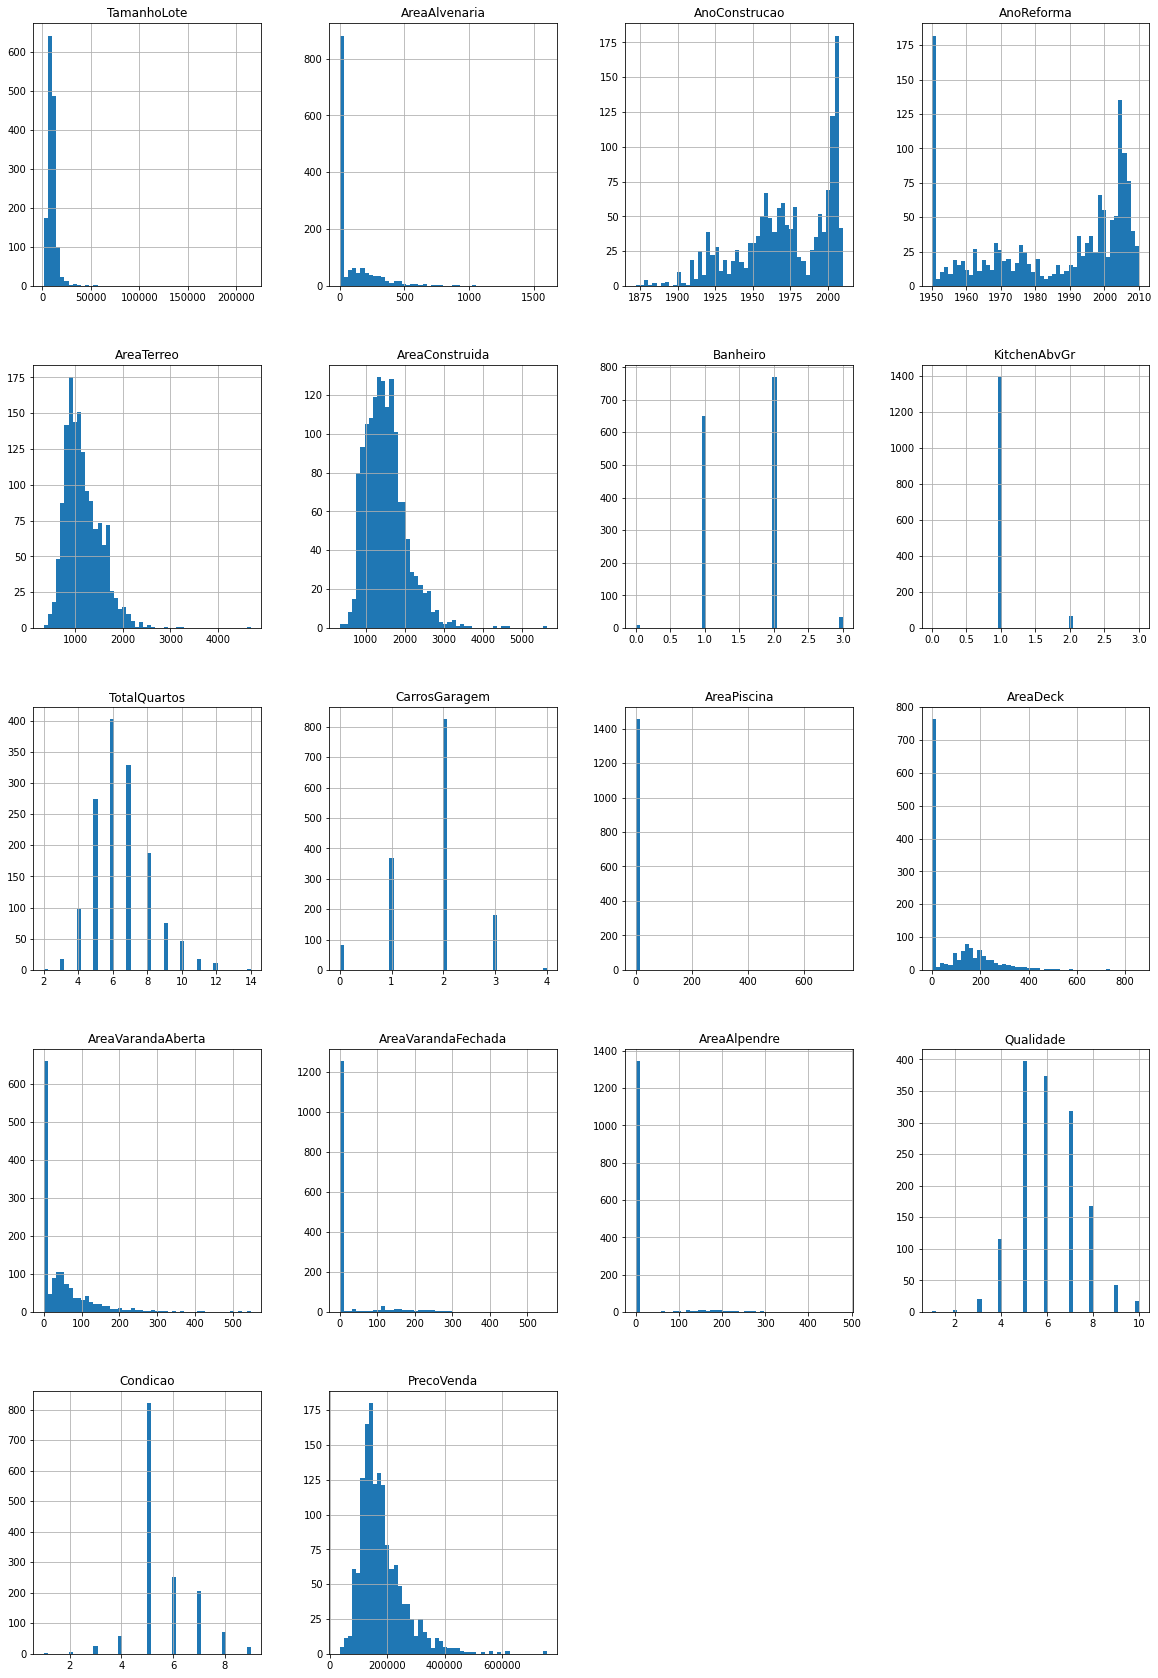

In [12]:
%%time
df_filtrado.hist(bins=50, figsize=(20,30))

## 2.3 Separando um conjunto de teste (20%)

In [13]:
msk = np.random.rand(len(df_original)) < 0.20 # cria uma mascara com as posicoes
df_teste = df_original[msk]
df_treino = df_original[~msk]

In [14]:
print(f'Qtde teste: {df_teste.shape[0]}')
print(f'Qtde treino: {df_treino.shape[0]}')

Qtde teste: 290
Qtde treino: 1170


# 3 Explorar os dados para obter informações úteis